# GEOG 490 Final Project - Bus stops, grocery stores

In [5]:
import numpy as np 
import geopandas as gpd
import osmnx as ox
import networkx as nx
import os 
os.environ['USE_PYGEOS'] = '0' 
import matplotlib.pyplot as plt 
import folium

In [6]:
from shapely.geometry import Point, LineString, Polygon, MultiPolygon 
from descartes import PolygonPatch

## Data

### EMX

In [7]:
cd downloads

/Users/annajatsura/Downloads


In [8]:
EMX = gpd.read_file('EMX_and_LTD/EMX_Routes.shp')

In [9]:
EMX

,OBJECTID,ROUTE,Shape_Leng,geometry
0,31,EmX Blue,34562.838320,"MULTILINESTRING ((4258075.088 879976.089, 4258..."
1,32,EmX Green,65076.494759,"MULTILINESTRING ((4255587.775 876606.804, 4255..."


<AxesSubplot: >

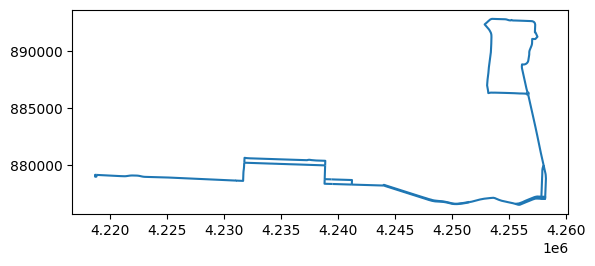

In [10]:
EMX.plot()

### Grocery Stores

In [11]:
grocery_stores = gpd.read_file('GroceryStores/GroceryStores.shp')

In [12]:
mask = (grocery_stores['city_name'] == 'Eugene')

In [13]:
eug_grocery = grocery_stores[mask]

In [14]:
eug_grocery

,OBJECTID,geofeat_id,concat_add,house_nbr,house_suff,pre_direct,street_nam,street_typ,unit_type_,unit_id,...,blockgr,ctract,x_coordina,y_coordina,latitude,longitude,psap_code,psap_name,trans_anal,geometry
21,10726,28457,27359 CLEAR LAKE RD 1,27359,NaN,NaN,CLEAR LAKE,RD,NaN,1,...,1,1001,4.195295e+06,903821.945210,44.113655,-123.264513,CL,CENTRAL LANE PSAP,0,POINT (4195295.170 903821.945)
76,41889,69810,3821 RIVER RD,3821,NaN,NaN,RIVER,RD,NaN,NaN,...,1,2302,4.228606e+06,904803.036089,44.119291,-123.137866,CL,CENTRAL LANE PSAP,152,POINT (4228606.367 904803.036)
77,44806,67857,90047 PRAIRIE RD,90047,NaN,NaN,PRAIRIE,RD,NaN,NaN,...,1,2403,4.221799e+06,900445.716864,44.106754,-123.163247,CL,CENTRAL LANE PSAP,34,POINT (4221798.801 900445.717)
78,44981,69803,3620 RIVER RD,3620,NaN,NaN,RIVER,RD,NaN,NaN,...,3,2401,4.228678e+06,903584.816273,44.115958,-123.137449,CL,CENTRAL LANE PSAP,147,POINT (4228677.588 903584.816)
79,45950,69726,2735 RIVER RD,2735,NaN,NaN,RIVER,RD,NaN,NaN,...,1,2301,4.230259e+06,899079.042323,44.103741,-123.130892,CL,CENTRAL LANE PSAP,138,POINT (4230258.863 899079.042)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,164156,1283950,2310 W 6TH AVE,2310,NaN,W,6TH,AVE,NaN,NaN,...,2,4200,4.230521e+06,881100.655840,44.054471,-123.127749,CL,CENTRAL LANE PSAP,266,POINT (4230520.647 881100.656)
227,168799,1415703,203 COBURG RD,203,NaN,NaN,COBURG,RD,NaN,NaN,...,2,3102,4.244089e+06,884061.351050,44.063745,-123.076511,CL,CENTRAL LANE PSAP,210,POINT (4244088.961 884061.351)
229,171016,86113,698 W 6TH AVE,698,NaN,W,6TH,AVE,NaN,NaN,...,3,4200,4.236973e+06,880374.250656,44.053032,-123.103132,CL,CENTRAL LANE PSAP,254,POINT (4236973.194 880374.251)
232,173266,1417282,353 E BROADWAY,353,NaN,E,BROADWAY,NaN,NaN,NaN,...,1,3900,4.240996e+06,879287.021982,44.050393,-123.087711,CL,CENTRAL LANE PSAP,375,POINT (4240995.932 879287.022)


<AxesSubplot: >

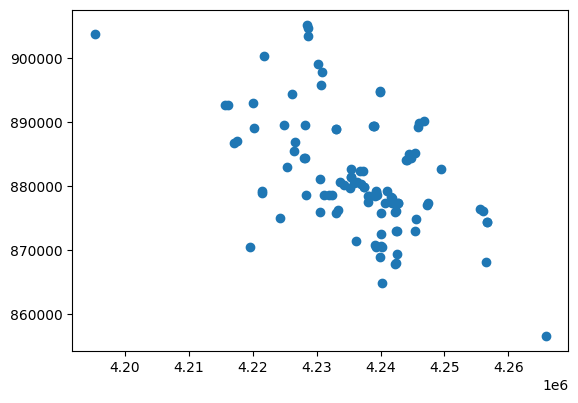

In [15]:
eug_grocery.plot()

## LTD

In [16]:
LTD_Stops = gpd.read_file('EMX_and_LTD/LTD_Stops_Fall_2019.shp')

In [17]:
LTD_Stops

,OBJECTID,stop_numbe,geo_node_i,stop_name,latitude,longitude,geometry
0,1,00001,1.0,E/S of 58th N of Main,44.046335,-122.926726,POINT (-122.92673 44.04634)
1,2,00002,2.0,E/S of 58th S of D,44.049456,-122.926220,POINT (-122.92622 44.04946)
2,3,00004,4.0,E/S of 58th S of Thurston Rd,44.052247,-122.926243,POINT (-122.92624 44.05225)
3,4,00006,5.0,S/S of Thurston W of 64th,44.052949,-122.916628,POINT (-122.91663 44.05295)
4,5,00007,6.0,S/S of Thurston E of 65th,44.052675,-122.913227,POINT (-122.91323 44.05267)
...,...,...,...,...,...,...,...
1328,1329,arr_com,1970.0,Approaching Commerce Street turnaround,44.048186,-123.169252,POINT (-123.16925 44.04819)
1329,1330,arr_senc,1971.0,Seneca Park and Ride arrival zone,44.048722,-123.142496,POINT (-123.14250 44.04872)
1330,1331,01898,1974.0,E/S of Danebo N of Isabelle,44.054316,-123.178170,POINT (-123.17817 44.05432)
1331,1332,01899,1975.0,W/S of Danebo N of Isabelle,44.053741,-123.178307,POINT (-123.17831 44.05374)


In [18]:
from shapely.geometry import Point

In [19]:
point_gdf = gpd.GeoDataFrame(geometry=[point], crs='EPSG:32610')

NameError: name 'point' is not defined

In [20]:
buffer = point_gdf.buffer(1609.34)

NameError: name 'point_gdf' is not defined

In [21]:
LTD_points = gpd.read_file('EMX_and_LTD/LTD_Stops_Fall_2019.shp')

In [28]:
LTD_Buffer = LTD_points.buffer(distance=1609.34)

/var/folders/d_/dqfm_b752lx0rv3tmv32n9k80000gn/T/ipykernel_99754/1246748851.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  LTD_Buffer = LTD_points.buffer(distance=1609.34)


### Reproject

In [22]:
LTD_points = gpd.read_file('EMX_and_LTD/LTD_Stops_Fall_2019.shp')

In [23]:
target_crs = 'EPSG:32610'

In [24]:
LTD_points = LTD_points.to_crs(target_crs)

### Buffer around bus stops

In [25]:
buffer_distance = 1609.34 
LTD_Buffer = LTD_points.buffer(distance=buffer_distance)

<AxesSubplot: >

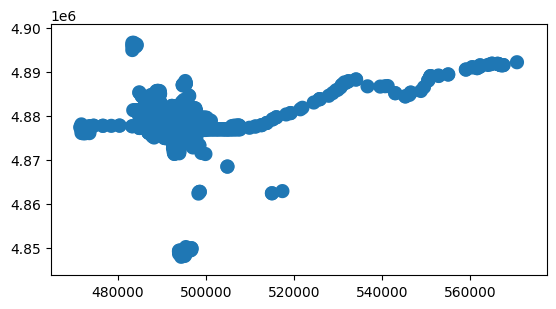

In [26]:
LTD_Buffer.plot()

In [27]:
poi = Point(44.0448, -123.072) 

In [28]:
buffer = poi.buffer(1609.34)

In [29]:
G = ox.graph_from_point(poi, distance=1609.34, network_type='all')

TypeError: graph_from_point() got an unexpected keyword argument 'distance'

### Centroids 

In [30]:
LTD_Stops['geometry'] = LTD_Stops['geometry'].centroid

/var/folders/d_/dqfm_b752lx0rv3tmv32n9k80000gn/T/ipykernel_5014/3666616546.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  LTD_Stops['geometry'] = LTD_Stops['geometry'].centroid


In [31]:
LTD_Stops = LTD_Stops.to_crs(target_crs)

In [32]:
LTD_Stops['geometry'] = LTD_Stops['geometry'].centroid

In [33]:
eug_grocery = eug_grocery.to_crs(target_crs)

In [34]:
eug_grocery['geometry'] = eug_grocery['geometry'].centroid

In [35]:
location_point = LTD_Stops['geometry'].centroid.values[0]

In [36]:
g1 = ox.graph_from_point(location_point, distance=500, network=G, trip_times=[5, 10, 15, 20, 25], edge_buff=25, node_buff=0, infill=True)

NameError: name 'G' is not defined

### Isochrone Map pt 1

In [37]:
trip_times = [5, 10, 15, 20, 25]

In [38]:
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="plasma", start=0, return_hex=True)

## Part 2 - Centriods

In [39]:
LTD_stops_poi = LTD_Stops.geometry.centroid

In [40]:
eug_grocery_cent = eug_grocery.geometry.centroid.iloc[0]

In [41]:
lat_lon = [44.0448, -123.0726]

In [42]:
G = ox.graph_from_point(lat_lon, network_type="all_private")

In [44]:
LTD_stops_points_proj = LTD_stops_poi.to_crs(G.graph['crs'])
eug_grocery_centroid_proj = eug_grocery_centroid.to_crs(G.graph['crs'])

NameError: name 'eug_grocery_centroid' is not defined

### centorids error

In [45]:
print(LTD_Stops.crs)

EPSG:32610


In [46]:
print(eug_grocery.crs)

EPSG:32610


In [47]:
print(LTD_stops_points.crs)

NameError: name 'LTD_stops_points' is not defined

In [48]:
print(eug_grocery_cent.crs)

AttributeError: 'Point' object has no attribute 'crs'

In [49]:
eug_grocery = eug_grocery.to_crs('EPSG:32610')

In [50]:
eug_grocery_cent = eug_grocery.geometry.centroid.iloc[0]

In [51]:
print(eug_grocery_cent.crs)

AttributeError: 'Point' object has no attribute 'crs'

In [52]:
eug_grocery_cent = eug_grocery_cent.set_crs('EPSG:32610')
print(eug_grocery_cent.crs)

AttributeError: 'Point' object has no attribute 'set_crs'

In [53]:
eug_grocery_cent = Point(44.0448, -123.0726)
eug_grocery_cent_gdf = gpd.GeoDataFrame(geometry=[eug_grocery_cent], crs='EPSG:32610')
print(eug_grocery_cent_gdf.crs)

EPSG:32610


In [54]:
nodes = ox.graph_to_gdfs(graph_proj, nodes=True, edges=False)
edges = ox.graph_to_gdfs(graph_proj, nodes=False, edges=True)

NameError: name 'graph_proj' is not defined

## Centroids pt 3

In [55]:
LTD_stops_points_proj = LTD_stops_points.to_crs(G.graph['crs'])

NameError: name 'LTD_stops_points' is not defined

In [56]:
eug_grocery_centroid_proj = eug_grocery_cent_gdf.to_crs(G.graph['crs'])

In [57]:
buffer_dist_m = 1609.34

In [58]:
eug_grocery_buffer = eug_grocery_centroid_proj.buffer(buffer_dist_m)

/var/folders/d_/dqfm_b752lx0rv3tmv32n9k80000gn/T/ipykernel_5014/2347107278.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eug_grocery_buffer = eug_grocery_centroid_proj.buffer(buffer_dist_m)


In [59]:
grocery_stores = gpd.read_file('GroceryStores/GroceryStores.shp')

In [60]:
mask = (grocery_stores['city_name'] == 'Eugene')

In [61]:
eug_grocery = grocery_stores[mask]

In [62]:
eug_grocery = eug_grocery.to_crs('EPSG:32610')

In [63]:
eug_grocery_centroid = eug_grocery.centroid

In [64]:
eug_grocery_centroid = gpd.GeoDataFrame(eug_grocery_centroid, geometry='geometry', crs='EPSG:32610')

ValueError: Unknown column geometry

In [65]:
eug_grocery_buffer = eug_grocery_centroid.buffer(buffer_dist_m)

In [66]:
eug_grocery_buffer = gpd.GeoDataFrame(eug_grocery_buffer.rename('geometry'), crs='EPSG:32610')

In [67]:
eug_grocery_within = gpd.sjoin(eug_grocery_buffer, eug_grocery, op='intersects')

/Users/annajatsura/.gds/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [68]:
eug_grocery_within = gpd.sjoin(eug_grocery_buffer, eug_grocery, how='inner', predicate='intersects')

In [69]:
G = ox.graph_from_place(lat_lon, network_type='all')

ValueError: each query must be a dict or a string

In [70]:
north, south, east, west = 41, 45, -120, -125

In [71]:
bbox = {'north': north, 'south': south, 'east': east, 'west': west}

In [ ]:
G = ox.graph_from_bbox(north, south, east, west, network_type='all')

In [ ]:
fig, ax = ox.plot_graph(G, bgcolor='white', node_color='black', edge_color='grey', node_size=5)

In [87]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [88]:
trip_times = [5, 10, 15, 20, 25]

In [89]:
isochrones = ox.isochrone.isochrone(G, LTD_stops_points_proj, trip_times=trip_times, edge_weights='travel_time')

AttributeError: module 'osmnx' has no attribute 'isochrone'

## Map

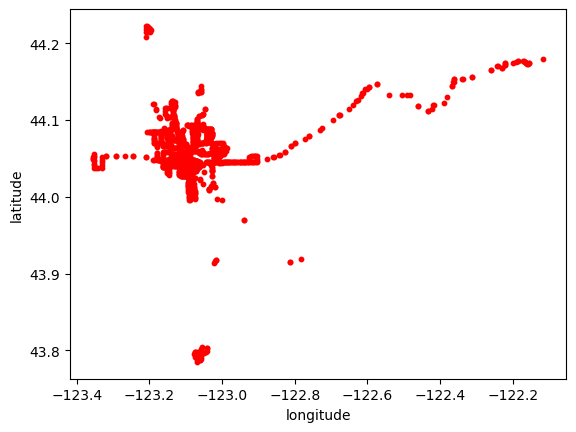

In [118]:
ax1 = LTD_Stops.plot.scatter(x="longitude", y="latitude", s=10, color='red')

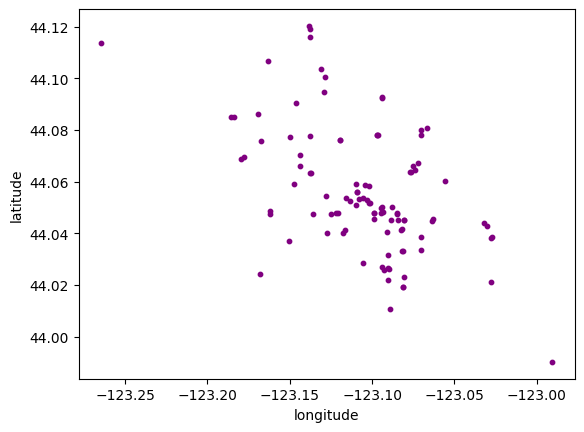

In [122]:
ax2 = eug_grocery.plot.scatter(x="longitude", y="latitude", s=10, color='purple')

In [99]:
lat_lon = [44.0448, -123.0726]
m = folium.Map(location=lat_lon, zoom_start=15)

In [91]:
print(eug_grocery.shape)

(103, 49)


In [100]:
eug_grocery['centroid'] = eug_grocery['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x))

In [101]:
for i in range(0, eug_grocery.shape[0]):
    my_string = eug_grocery.iloc[i]
    folium.Marker([eug_grocery.iloc[i]['centroid'].y, eug_grocery.iloc[i]['centroid'].x],
                 popup=my_string).add_to(m)

In [103]:
print(LTD_Stops.shape)

(1333, 7)


In [104]:
LTD_Stops['centroid'] = LTD_Stops['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x))

In [105]:
for i in range(0, LTD_Stops.shape[0]):
    my_string = LTD_Stops.iloc[i]
    folium.Marker([LTD_Stops.iloc[i]['centroid'].y, LTD_Stops.iloc[i]['centroid'].x],
                 popup=my_string).add_to(m)

In [116]:
m

## Isochrone Map

In [107]:
trip_times = [5, 10, 15, 20, 25] 

In [108]:
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="plasma", start=0, return_hex=True)

In [109]:
graph_proj = ox.project_graph(G, to_crs=None)

In [110]:
orig_xy = [LTD_Stops['centroid'].y.values[0], LTD_Stops['centroid'].x.values[0]]

In [111]:
target_xy = [eug_grocery['centroid'].y.values[0], eug_grocery['centroid'].x.values[0]]

In [112]:
orig_node = ox.distance.nearest_nodes(graph_proj, X=orig_xy[1], Y=orig_xy[0], return_dist=False)

In [113]:
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(graph_proj, orig_node, radius=trip_time, distance="time")
    for node in subgraph.nodes():
        node_colors[node] = color

In [114]:
nc = [node_colors[node] if node in node_colors else "none" for node in graph_proj.nodes()]
ns = [10 if node in node_colors else 0 for node in graph_proj.nodes()]

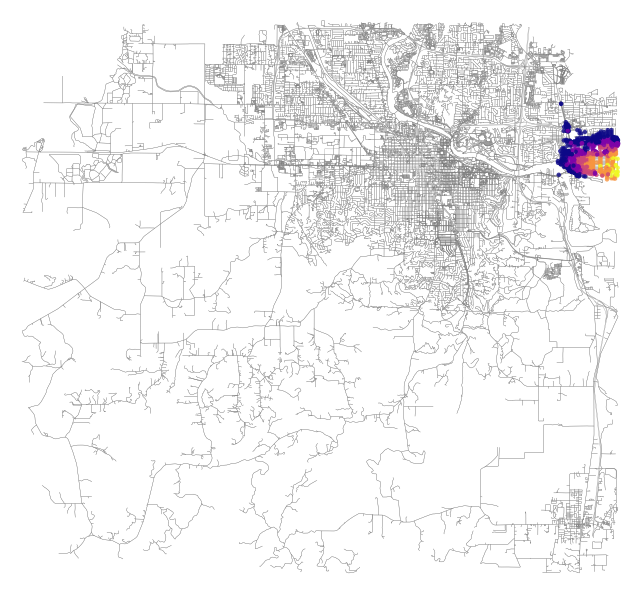

In [115]:
fig, ax = ox.plot_graph(graph_proj, node_color=nc, node_size=ns, node_alpha=0.8,
    edge_linewidth=0.2, edge_color="grey", bgcolor='white')

#### graph pt 2

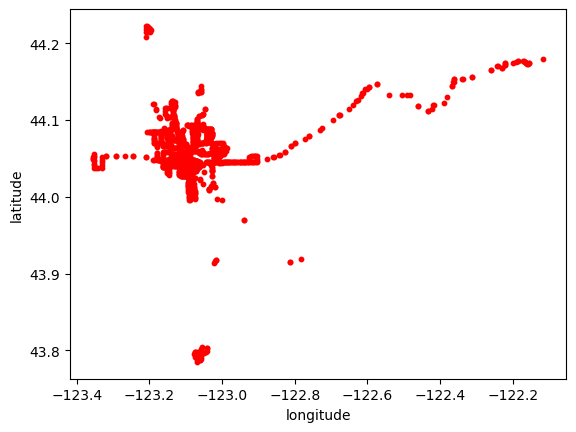

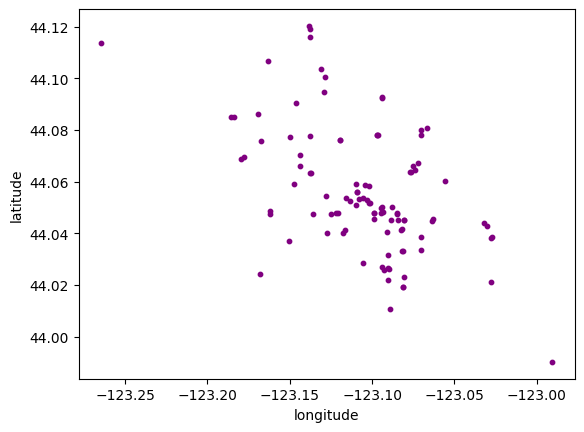

In [139]:
ax1 = LTD_Stops.plot.scatter(x="longitude", y="latitude", s=10, color='red')
ax2 = eug_grocery.plot.scatter(x="longitude", y="latitude", s=10, color='purple')

In [129]:
ax1.set_xlim(-124, 121)
ax1.set_ylim(43,45)

(43.0, 45.0)

In [ ]:
print(eug_grocery.shape)